In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
#import the training dataset for training the data
train_df=pd.read_csv(r"D:\programming\coding\codsoft_dataset\fraudtrain.csv")
test_df=pd.read_csv(r"D:\programming\coding\codsoft_dataset\fraudtest.csv")
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [76]:
train_df['merchant'].value_counts()

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

In [77]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [78]:
frames = [train_df,test_df]
df = pd.concat(frames)

In [79]:
'''removing merchant,first,last,street,date of birth and transaction 
    as it does not affect or correlate with our dataset'''
df=df.drop(['merchant','first','last','street','dob','trans_date_trans_time','cc_num','trans_num'],axis='columns')



In [80]:
df.head()

,Unnamed: 0,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,0,misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,1,grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,2,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,3,gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,4,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0


In [81]:
df['category'].value_counts()

category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64

In [82]:
df['city'].value_counts()

city
Birmingham     8040
San Antonio    7312
Utica          7309
Phoenix        7297
Meridian       7289
               ... 
Chattanooga       7
Karns City        7
Vacaville         7
Streator          7
Wever             6
Name: count, Length: 906, dtype: int64

In [83]:
df['gender'].value_counts()

gender
F    1014749
M     837645
Name: count, dtype: int64

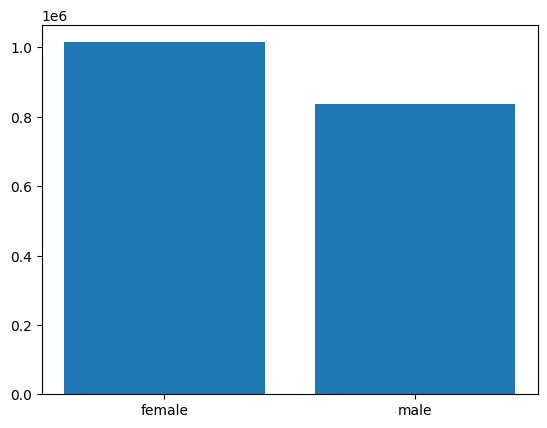

In [84]:
plt.bar(x=['female','male'],height=[1014749,837645])
plt.show()

In [85]:
np.unique(df['category'])

array(['entertainment', 'food_dining', 'gas_transport', 'grocery_net',
       'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
       'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
       'travel'], dtype=object)

LABEL ENCODE ALL THE CATEGORICAL VALUES

In [86]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['category']=lr.fit_transform(df['category'])
df['city']=lr.fit_transform(df['city'])
df['gender']=lr.fit_transform(df['gender'])
df['state']=lr.fit_transform(df['state'])
df['job']=lr.fit_transform(df['job'])

In [87]:
df

,Unnamed: 0,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,0,8,4.97,0,532,27,28654,36.0788,-81.1781,3495,372,1325376018,36.011293,-82.048315,0
1,1,4,107.23,0,619,47,99160,48.8878,-118.2105,149,431,1325376044,49.159047,-118.186462,0
2,2,0,220.11,1,474,13,83252,42.1808,-112.2620,4154,308,1325376051,43.150704,-112.154481,0
3,3,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,330,1325376076,47.034331,-112.561071,0
4,4,9,41.96,1,217,45,24433,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,5,43.77,1,471,24,63453,40.4931,-91.8912,519,477,1388534347,39.946837,-91.333331,0
555715,555715,7,111.84,1,427,43,77566,29.0393,-95.4401,28739,207,1388534349,29.661049,-96.186633,0
555716,555716,7,86.88,0,110,47,99323,46.1966,-118.9017,3684,307,1388534355,46.658340,-119.715054,0
555717,555717,13,7.99,1,508,13,83643,44.6255,-116.4493,129,63,1388534364,44.470525,-117.080888,0


In [88]:
df.corr()

,Unnamed: 0,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,-0.000130,0.000949,-0.000233,-0.001140,0.001233,0.000370,0.000239,-0.000610,-0.000880,0.000290,0.174527,0.000211,-0.000611,0.000524
category,-0.000130,1.000000,0.029665,-0.028088,-0.000045,0.000164,0.003013,-0.008526,-0.001406,0.009318,0.002993,0.001043,-0.008417,-0.001404,0.019278
amt,0.000949,0.029665,1.000000,0.000740,-0.000240,0.000433,0.001979,-0.000670,-0.000735,0.004921,-0.001858,-0.002411,-0.000613,-0.000711,0.209308
gender,-0.000233,-0.028088,0.000740,1.000000,0.016330,-0.031085,-0.066106,0.042862,0.050653,-0.028862,-0.079708,-0.001387,0.042621,0.050606,0.005844
city,-0.001140,-0.000045,-0.000240,0.016330,1.000000,-0.042611,0.075212,-0.031132,-0.067092,0.034824,0.021540,0.000657,-0.030870,-0.067070,-0.001107
state,0.001233,0.000164,0.000433,-0.031085,-0.042611,1.000000,-0.116563,0.213532,0.132324,-0.012633,0.043112,-0.000331,0.212190,0.132217,-0.000252
zip,0.000370,0.003013,0.001979,-0.066106,0.075212,-0.116563,1.000000,-0.114554,-0.909795,0.077601,-0.006690,0.001017,-0.113934,-0.908981,-0.002190
lat,0.000239,-0.008526,-0.000670,0.042862,-0.031132,0.213532,-0.114554,1.000000,-0.014744,-0.154816,-0.026926,0.000741,0.993582,-0.014709,0.002904
long,-0.000610,-0.001406,-0.000735,0.050653,-0.067092,0.132324,-0.909795,-0.014744,1.000000,-0.052359,-0.002293,-0.000574,-0.014585,0.999118,0.001022
city_pop,-0.000880,0.009318,0.004921,-0.028862,0.034824,-0.012633,0.077601,-0.154816,-0.052359,1.000000,-0.054328,-0.001636,-0.153863,-0.052329,0.000325


In [89]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
y=y.reshape(-1,1)
print(x.shape,y.shape)

(1852394, 14) (1852394, 1)


In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

LOGISTIC REGRESSION MODEL

In [91]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)


d:\anaconda\envs\py310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\anaconda\envs\py310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

DECISION TREE CLASSIFIER MODEL

In [92]:
from sklearn.tree import DecisionTreeClassifier
dc_model=DecisionTreeClassifier()
dc_model.fit(x_train,y_train)

DecisionTreeClassifier()

KNearestNeighbour MODEL

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

d:\anaconda\envs\py310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

PREDICTION

In [94]:
lr_pred=lr_model.predict(x_test)
dc_pred=dc_model.predict(x_test)
knn_pred=knn_model.predict(x_test)

METRICES

In [96]:
from sklearn.metrics import accuracy_score,confusion_matrix
ac_lr=accuracy_score(lr_pred,y_test)
cm_lr=confusion_matrix(lr_pred,y_test)
ac_dc=accuracy_score(dc_pred,y_test)
cm_dc=confusion_matrix(dc_pred,y_test)
ac_knn=accuracy_score(knn_pred,y_test)
cm_knn=confusion_matrix(knn_pred,y_test)

In [97]:
print("*"*100)
print("Arruracy score for logistic regression is:",ac_lr)
print("Confusion matrix for logistic regression is:\n",cm_lr)
print("*"*100)
print("Accuracy score for Random Forest classifier is:",ac_dc)
print("Confusion matrix for Random Forest classifier is:\n",cm_dc)
print("*"*100)
print("Accuracy score for kneighborsclassifier is:",ac_knn)
print('Confusion matrix for Kneighborsclassifier is:\n',cm_knn)
print("*"*100)

****************************************************************************************************
Arruracy score for logistic regression is: 0.9947203485217786
Confusion matrix for logistic regression is:
 [[368523   1956]
 [     0      0]]
****************************************************************************************************
Accuracy score for Random Forest classifier is: 0.9963182798485204
Confusion matrix for Random Forest classifier is:
 [[367798    639]
 [   725   1317]]
****************************************************************************************************
Accuracy score for kneighborsclassifier is: 0.9945260055225802
Confusion matrix for Kneighborsclassifier is:
 [[368070   1575]
 [   453    381]]
****************************************************************************************************
